In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [ ]:
# Hacky function to split time codes into clearer datetime format
def int2date(argdate: int) -> date:
    """
    If you have date as an integer, use this method to obtain a datetime.date object.

    Parameters
    ----------
    argdate : int
      Date as a regular integer value (example: 20160618)

    Returns
    -------
    dateandtime.date
      A date object which corresponds to the given value `argdate`.
    """
    year = int((argdate / 10000) + 2000)
    month = int((argdate % 10000) / 100)
    day = int(argdate % 100)

    return date(year, month, day)

In [2]:
# Read in df
df = pd.read_excel("/Users/au564346/Documents/research/digital_literacies/projects/Kirstine&Anne/viz/data/CodingScheme_ENDELIGKODNING.xlsx", header=0)

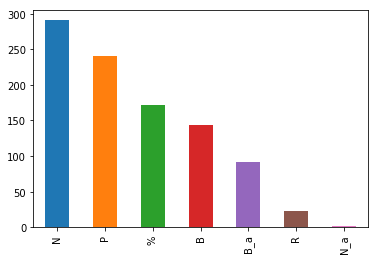

In [163]:
#df.Domain.value_counts().plot(kind='bar')

### Viz 1 Distribution of Biblical vs Non-Biblical entities

In [3]:
# Work with only non-biblical entities
non_bib = df.loc[df['Domain'] == "N"]
non_bib.head()

,Entity,Frequency,Domain,Gender,Time,Nationality,Type 1,Type 2,Type 3,Type 4,Comments
15,Luther,1147,N,1,PAST,EUR,THE,%,%,%,NaN
18,Grundtvig,1097,N,1,PAST,DK,THE,LIT,%,%,NaN
57,Martin Luther,311,N,1,PAST,EUR,THE,%,%,%,GENTAGELSE celle17
60,Kierkegaard,289,N,1,PAST,DK,THE,LIT,%,%,NaN
62,Søren Kierkegaard,272,N,1,PAST,DK,THE,LIT,%,%,GENTAGELSE celle 62


In [4]:
# Number of non-bib vs Bib entities
non_bib_ents = len(non_bib) 
bib_ents = len(df) - len(non_bib)

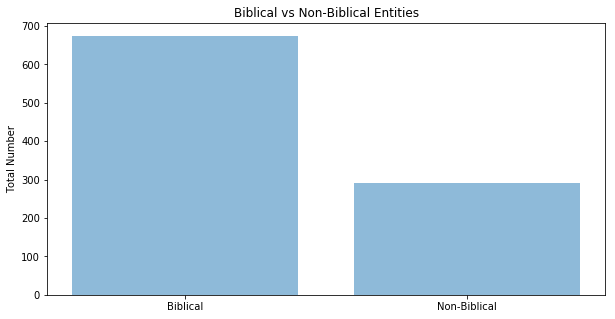

In [553]:
# Plot
ent_type = ('Biblical', 'Non-Biblical')
y_pos1 = np.arange(len(ent_type))
counts1 = [bib_ents,non_bib_ents]
 
plt.bar(y_pos1, counts1, align='center', alpha=0.5)
plt.xticks(y_pos1, ent_type)
plt.ylabel('Total Number')
plt.title('Biblical vs Non-Biblical Entities')
plt.savefig("basic/Bib-vs-NonBib")
plt.show()

### Viz 2 - Distribution of non-biblical genders

In [6]:
# Count number of male and female non-biblical entities
male = len(non_bib.loc[non_bib['Gender'] == 1])
female = len(non_bib.loc[non_bib['Gender'] == 2])

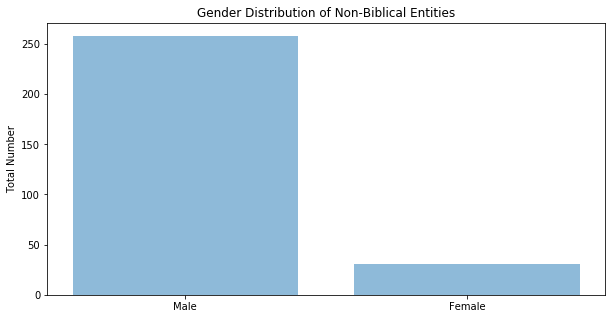

In [554]:
# Plot
genders = ('Male', 'Female')
y_pos = np.arange(len(genders))
counts = [male,female]
 
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, genders)
plt.ylabel('Total Number')
plt.title('Gender Distribution of Non-Biblical Entities')
plt.savefig("basic/GenderDistribution-NonBib.png")
plt.show()

### Viz 3 - Distribution of non-biblical entities over time

In [8]:
# Read in specific entitiy metadata
specifics = pd.read_excel("/Users/au564346/Documents/research/digital_literacies/projects/Kirstine&Anne/viz/data/11955_All_Entites_With_Metadata.xlsx", sheet="People")
specifics.head()

,ID-dok,sentence,NAMED PERSON,ID-præst,dato,helligdag,sogn str.,stift,årgang,køn,uddannelsessted
0,pr1_1,2,Jesus,1.0,140112,1Hel_L,2467/2795,Viborg,1976.0,1.0,Aarhus
1,pr1_1,4,Kristus,1.0,140112,1Hel_L,2467/2795,Viborg,1976.0,1.0,Aarhus
2,pr1_1,21,Jesus,1.0,140112,1Hel_L,2467/2795,Viborg,1976.0,1.0,Aarhus
3,pr1_1,25,Jesus,1.0,140112,1Hel_L,2467/2795,Viborg,1976.0,1.0,Aarhus
4,pr1_1,25,Jesus,1.0,140112,1Hel_L,2467/2795,Viborg,1976.0,1.0,Aarhus


In [9]:
# Strip whitespace and punctuation
specifics["NAMED PERSON"] = specifics["NAMED PERSON"].str.replace('[^\w\s]','')
# New table of only entities in the non-biblical table
specifics_non_bib = specifics.loc[specifics['NAMED PERSON'].isin(non_bib["Entity"])]

In [50]:
# New table of only entity and date
ent_dato = specifics_non_bib[['NAMED PERSON', 'dato']].copy()
# Add entity categories
ent_dato = pd.merge(ent_dato, non_bib, left_on="NAMED PERSON", right_on="Entity")
ent_dato.head()

,NAMED PERSON,dato,Entity,Frequency,Domain,Gender,Time,Nationality,Type 1,Type 2,Type 3,Type 4,Comments
0,Søren Kierkegaard,140112,Søren Kierkegaard,272,N,1,PAST,DK,THE,LIT,%,%,GENTAGELSE celle 62
1,Søren Kierkegaard,151101,Søren Kierkegaard,272,N,1,PAST,DK,THE,LIT,%,%,GENTAGELSE celle 62
2,Søren Kierkegaard,160731,Søren Kierkegaard,272,N,1,PAST,DK,THE,LIT,%,%,GENTAGELSE celle 62
3,Søren Kierkegaard,160130,Søren Kierkegaard,272,N,1,PAST,DK,THE,LIT,%,%,GENTAGELSE celle 62
4,Søren Kierkegaard,161103,Søren Kierkegaard,272,N,1,PAST,DK,THE,LIT,%,%,GENTAGELSE celle 62


In [562]:
ent_dato["Entity"].value_counts()

Luther                    1147
Grundtvig                 1097
Martin Luther              311
Kierkegaard                289
Søren Kierkegaard          272
Lucia                      199
Hitler                     192
Brorson                    175
Kaj Munk                   153
Kingo                      128
Lewis                      124
Benny Andersen             119
Bonhoeffer                  87
Søren Ulrik Thomsen         86
Johannes Møllehave          84
Nelson Mandela              82
Muhammed                    81
Dietrich Bonhoeffer         78
Arne Haugen Sørensen        68
Desmond Tutu                67
Melchior                    66
Rembrandt                   63
Møllehave                   61
Augustin                    60
Frans                       60
Peter Plys                  58
Grundtvigs                  57
Mandela                     57
Allah                       57
Charlotte Rørth             57
                          ... 
Khalid                      10
Marianne

In [73]:
type1 = pd.DataFrame(ent_dato["Type 1"].value_counts().reset_index())
type1

,index,Type 1
0,THE,4947
1,LIT,1094
2,LEG,944
3,POL,748
4,FIC,600
5,MUS,449
6,ART,440
7,ACA,289
8,CRI,141
9,OUT,140


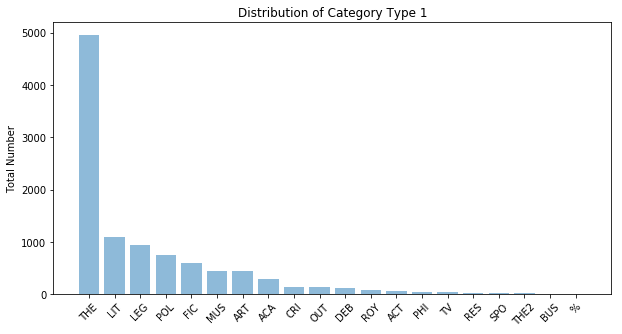

In [559]:
types = ("THE", "LIT", "LEG", "POL", "FIC", "MUS", "ART", "ACA", "CRI", "OUT", "DEB",
            "ROY", "ACT", "PHI", "TV", "RES", "SPO", "THE2", "BUS", "%")
y_pos = np.arange(len(types))
counts = type1["Type 1"]
 
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, types, rotation=45)
plt.ylabel('Total Number')
plt.title('Distribution of Category Type 1')
plt.savefig("basic/Category_Type1.png")
plt.show()

### Viz 4 - Distribution of entities by month

In [355]:
# Dates to string
ent_dato["dato"] = ent_dato["dato"].astype(str)
# Drop dates with only 5 numbers
mask = (ent_dato['dato'].str.len() > 5)
tester = ent_dato.loc[mask]
# Drop dates that contain 'xx'
date_clean = ent_dato[ent_dato["dato"].str.contains("xx") == False]
date_clean = date_clean[date_clean["dato"].str.contains("nan") == False]
date_clean["dato"] = date_clean["dato"].astype(int)
date_clean["dato"] = pd.to_datetime([int2date(row) for row in date_clean["dato"]])

#date_clean.set_index('dato', inplace=True)
#del date_clean["Entity"]

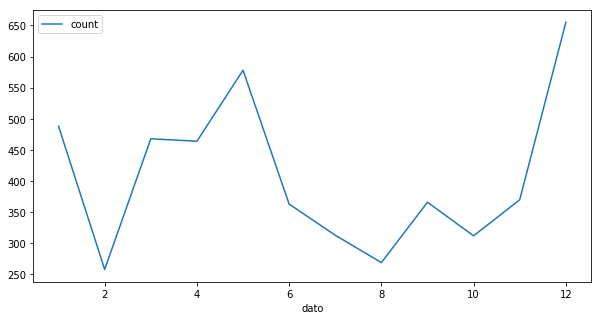

In [717]:
tmp = date_clean[['dato']].copy()
tmp = date_clean[date_clean["Type 1"] == "THE"][['dato']].copy()
tmp['count'] = 1
tmp.set_index('dato', inplace=True)
tmp1.sort_index().groupby(tmp1.index.month).sum().plot()

In [ ]:
tmp1 = date_clean[date_clean["Type 1"] == "THE"][['dato']].copy()
tmp1['count'] = 1
tmp1.set_index('dato', inplace=True)
tmp2 = date_clean[date_clean["Type 1"] == "LIT"][['dato']].copy()
tmp2['count'] = 1
tmp2.set_index('dato', inplace=True)
tmp3 = date_clean[date_clean["Type 1"] == "LEG"][['dato']].copy()
tmp3['count'] = 1
tmp3.set_index('dato', inplace=True)
tmp4 = date_clean[date_clean["Type 1"] == "POL"][['dato']].copy()
tmp4['count'] = 1
tmp4.set_index('dato', inplace=True)
tmp5 = date_clean[date_clean["Type 1"] == "FIC"][['dato']].copy()
tmp5['count'] = 1
tmp5.set_index('dato', inplace=True)
tmp6 = date_clean[date_clean["Type 1"] == "MUS"][['dato']].copy()
tmp6['count'] = 1
tmp6.set_index('dato', inplace=True)

In [648]:
ax1 = tmp1.sort_index().groupby(tmp1.index).sum()
ax2 = tmp2.sort_index().groupby(tmp2.index).sum()
ax3 = tmp3.sort_index().groupby(tmp3.index).sum()
ax4 = tmp4.sort_index().groupby(tmp4.index).sum()
ax5 = tmp5.sort_index().groupby(tmp5.index).sum()
ax6 = tmp6.sort_index().groupby(tmp6.index).sum()

### Viz 5 - Distribution of category over whole dataset

### Viz 6 - Individual enities by category over time?

In [737]:
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN",
        "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

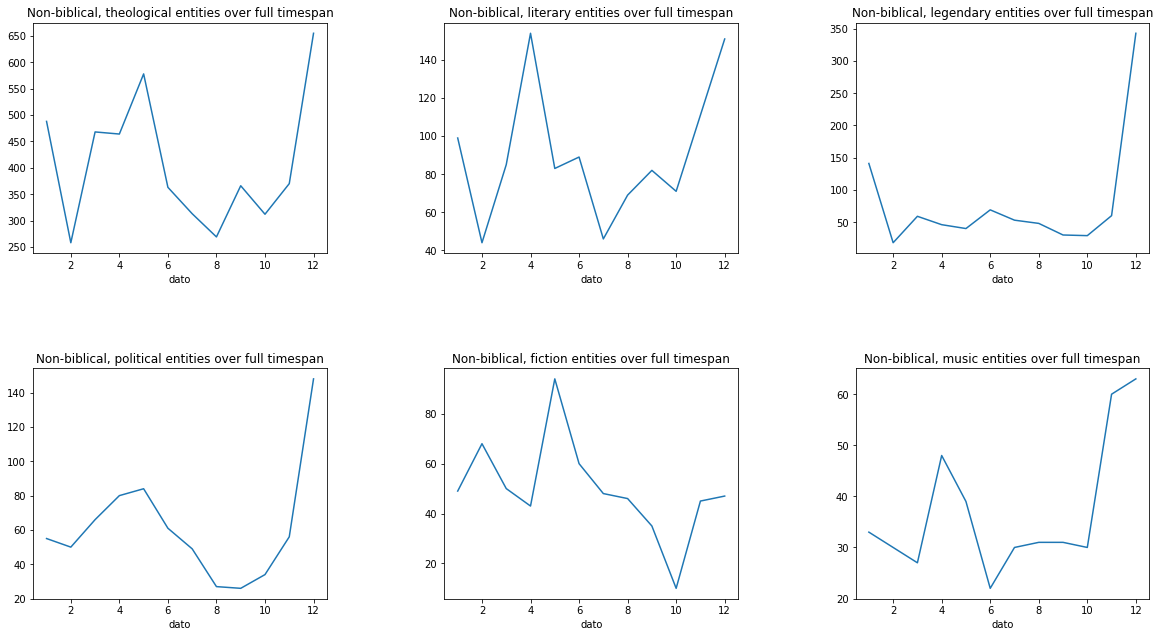

In [751]:
fig, axes = plt.subplots(nrows=2, ncols=3)
plt.subplots_adjust(top = 0.9, bottom=0.1, hspace=0.5, wspace=0.4)

vplot1 = tmp1.sort_index()\
            .groupby(tmp1.index.month)\
            .sum().plot(ax=axes[0,0], figsize=(20,10),
                        legend=False,
                        title="Non-biblical, theological entities over full timespan")

vplot2 = tmp2.sort_index()\
            .groupby(tmp2.index.month)\
            .sum().plot(ax=axes[0,1], figsize=(20,10),
                        legend=False, title="Non-biblical, literary entities over full timespan")

vplot3 = tmp3.sort_index()\
            .groupby(tmp3.index.month)\
            .sum().plot(ax=axes[0,2], figsize=(20,10),
                        legend=False, title="Non-biblical, legendary entities over full timespan")

vplot4 = tmp4.sort_index()\
            .groupby(tmp4.index.month)\
            .sum().plot(ax=axes[1,0], figsize=(20,10),
                        legend=False, title="Non-biblical, political entities over full timespan")

vplot5 = tmp5.sort_index()\
            .groupby(tmp5.index.month)\
            .sum().plot(ax=axes[1,1], figsize=(20,10),
                        legend=False, title="Non-biblical, fiction entities over full timespan")

vplot6 = tmp6.sort_index()\
            .groupby(tmp6.index.month)\
            .sum().plot(ax=axes[1,2], figsize=(20,10),
                        legend=False, title="Non-biblical, music entities over full timespan")

fig.savefig("basic/Different_Entities_Over_Time.png")

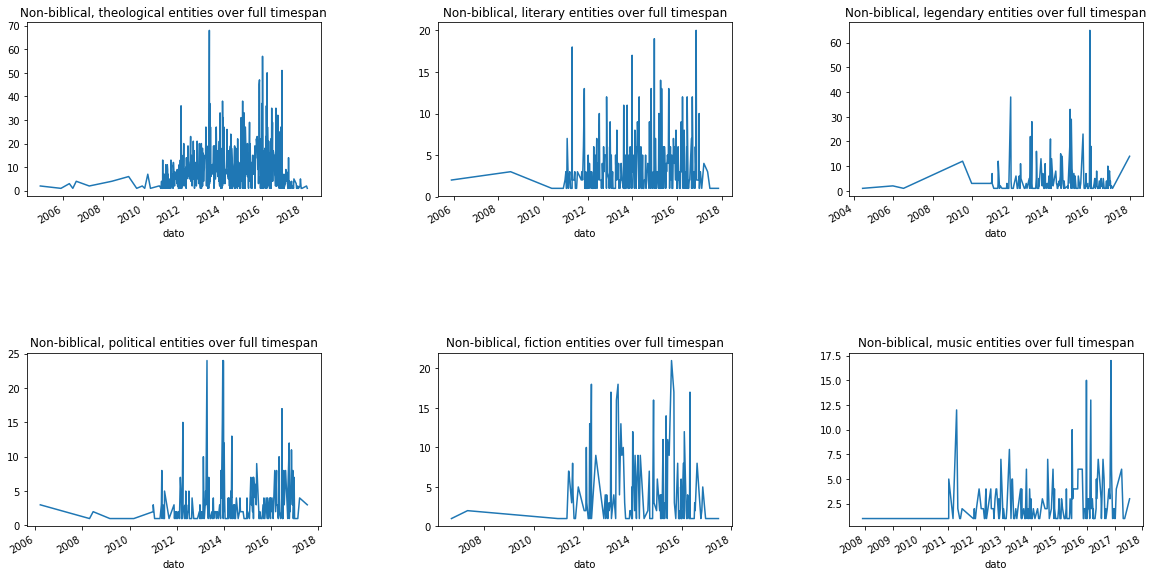

In [718]:
fig, axes = plt.subplots(nrows=2, ncols=3)
plt.subplots_adjust(top = 0.9, bottom=0.5, hspace=0.9, wspace=0.4)
#plt.tight_layout()

vplot1 = tmp1.sort_index()\
            .groupby(tmp1.index)\
            .sum().plot(ax=axes[0,0], figsize=(20,10),
                        legend=False, title="Non-biblical, theological entities over full timespan")

vplot2 = tmp2.sort_index()\
            .groupby(tmp2.index)\
            .sum().plot(ax=axes[0,1], figsize=(20,10),
                        legend=False, title="Non-biblical, literary entities over full timespan")

vplot3 = tmp3.sort_index()\
            .groupby(tmp3.index)\
            .sum().plot(ax=axes[0,2], figsize=(20,10),
                        legend=False, title="Non-biblical, legendary entities over full timespan")

vplot4 = tmp4.sort_index()\
            .groupby(tmp4.index)\
            .sum().plot(ax=axes[1,0], figsize=(20,10),
                        legend=False, title="Non-biblical, political entities over full timespan")

vplot5 = tmp5.sort_index()\
            .groupby(tmp5.index)\
            .sum().plot(ax=axes[1,1], figsize=(20,10),
                        legend=False, title="Non-biblical, fiction entities over full timespan")

vplot6 = tmp6.sort_index()\
            .groupby(tmp6.index)\
            .sum().plot(ax=axes[1,2], figsize=(20,10),
                        legend=False, title="Non-biblical, music entities over full timespan")

fig.savefig("basic/Different_Entities_Over_Years.png")